# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 400
LEARNING_RATE = 0.1
BATCH_SIZE = 512
ACTIVATION = "tanh"
N_HIDDEN = [512]
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def test_model():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512"
    return model, model_name

def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = test_model()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/400
26/26 [==============================] - 2s 12ms/step - loss: 1.1600 - categorical_accuracy: 0.4853 - val_loss: 1.0423 - val_categorical_accuracy: 0.5360
Epoch 2/400
26/26 [==============================] - 0s 5ms/step - loss: 0.9950 - categorical_accuracy: 0.5574 - val_loss: 0.9554 - val_categorical_accuracy: 0.5800
Epoch 3/400
26/26 [==============================] - 0s 5ms/step - loss: 0.9233 - categorical_accuracy: 0.5951 - val_loss: 0.9036 - val_categorical_accuracy: 0.5924
Epoch 4/400
26/26 [==============================] - 0s 5ms/step - loss: 0.8761 - categorical_accuracy: 0.6120 - val_loss: 0.8673 - val_categorical_accuracy: 0.6079
Epoch 5/400
26/26 [==============================] - 0s 5ms/step - loss: 0.8418 - categorical_accuracy: 0.6315 - val_loss: 0.8392 - val_categorical_accuracy: 0.6135
Epoch 6/400
26/26 [==============================] - 0s 5ms/step - loss: 0.8151 - categorical_accuracy: 0.6410 - val_loss: 0.8171 - val_categorical_accuracy: 0.6241
Epoch 7/4

26/26 [==============================] - 0s 5ms/step - loss: 0.6567 - categorical_accuracy: 0.7061 - val_loss: 0.6789 - val_categorical_accuracy: 0.6861
Epoch 51/400
26/26 [==============================] - 0s 5ms/step - loss: 0.6564 - categorical_accuracy: 0.7046 - val_loss: 0.6793 - val_categorical_accuracy: 0.6855
Epoch 52/400
26/26 [==============================] - 0s 5ms/step - loss: 0.6560 - categorical_accuracy: 0.7062 - val_loss: 0.6797 - val_categorical_accuracy: 0.6886
Epoch 53/400
26/26 [==============================] - 0s 5ms/step - loss: 0.6562 - categorical_accuracy: 0.7063 - val_loss: 0.6796 - val_categorical_accuracy: 0.6849
Epoch 54/400
26/26 [==============================] - 0s 5ms/step - loss: 0.6563 - categorical_accuracy: 0.7058 - val_loss: 0.6785 - val_categorical_accuracy: 0.6861
Epoch 55/400
26/26 [==============================] - 0s 5ms/step - loss: 0.6559 - categorical_accuracy: 0.7055 - val_loss: 0.6783 - val_categorical_accuracy: 0.6880
Epoch 56/400
26/2

26/26 [==============================] - 0s 8ms/step - loss: 0.6516 - categorical_accuracy: 0.7071 - val_loss: 0.6749 - val_categorical_accuracy: 0.6873
Epoch 100/400
26/26 [==============================] - 0s 7ms/step - loss: 0.6516 - categorical_accuracy: 0.7065 - val_loss: 0.6743 - val_categorical_accuracy: 0.6942
Epoch 101/400
26/26 [==============================] - 0s 8ms/step - loss: 0.6512 - categorical_accuracy: 0.7062 - val_loss: 0.6743 - val_categorical_accuracy: 0.6923
Epoch 102/400
26/26 [==============================] - 0s 8ms/step - loss: 0.6511 - categorical_accuracy: 0.7066 - val_loss: 0.6737 - val_categorical_accuracy: 0.6923
Epoch 103/400
26/26 [==============================] - 0s 8ms/step - loss: 0.6509 - categorical_accuracy: 0.7062 - val_loss: 0.6744 - val_categorical_accuracy: 0.6911
Epoch 104/400
26/26 [==============================] - 0s 7ms/step - loss: 0.6506 - categorical_accuracy: 0.7070 - val_loss: 0.6743 - val_categorical_accuracy: 0.6954
Epoch 105/40

26/26 [==============================] - 0s 7ms/step - loss: 0.6060 - categorical_accuracy: 0.7299 - val_loss: 0.6230 - val_categorical_accuracy: 0.7177
Epoch 149/400
26/26 [==============================] - 0s 7ms/step - loss: 0.6042 - categorical_accuracy: 0.7302 - val_loss: 0.6218 - val_categorical_accuracy: 0.7177
Epoch 150/400
26/26 [==============================] - 0s 7ms/step - loss: 0.6027 - categorical_accuracy: 0.7302 - val_loss: 0.6196 - val_categorical_accuracy: 0.7221
Epoch 151/400
26/26 [==============================] - 0s 7ms/step - loss: 0.6007 - categorical_accuracy: 0.7314 - val_loss: 0.6178 - val_categorical_accuracy: 0.7208
Epoch 152/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5992 - categorical_accuracy: 0.7318 - val_loss: 0.6159 - val_categorical_accuracy: 0.7258
Epoch 153/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5975 - categorical_accuracy: 0.7327 - val_loss: 0.6142 - val_categorical_accuracy: 0.7221
Epoch 154/40

26/26 [==============================] - 0s 7ms/step - loss: 0.5400 - categorical_accuracy: 0.7603 - val_loss: 0.5552 - val_categorical_accuracy: 0.7457
Epoch 198/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5393 - categorical_accuracy: 0.7600 - val_loss: 0.5523 - val_categorical_accuracy: 0.7506
Epoch 199/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5383 - categorical_accuracy: 0.7607 - val_loss: 0.5505 - val_categorical_accuracy: 0.7419
Epoch 200/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5374 - categorical_accuracy: 0.7602 - val_loss: 0.5500 - val_categorical_accuracy: 0.7481
Epoch 201/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5364 - categorical_accuracy: 0.7629 - val_loss: 0.5489 - val_categorical_accuracy: 0.7450
Epoch 202/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5355 - categorical_accuracy: 0.7635 - val_loss: 0.5482 - val_categorical_accuracy: 0.7500
Epoch 203/40

26/26 [==============================] - 0s 7ms/step - loss: 0.5065 - categorical_accuracy: 0.7728 - val_loss: 0.5186 - val_categorical_accuracy: 0.7543
Epoch 247/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5062 - categorical_accuracy: 0.7745 - val_loss: 0.5190 - val_categorical_accuracy: 0.7556
Epoch 248/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5056 - categorical_accuracy: 0.7739 - val_loss: 0.5179 - val_categorical_accuracy: 0.7605
Epoch 249/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5053 - categorical_accuracy: 0.7750 - val_loss: 0.5198 - val_categorical_accuracy: 0.7630
Epoch 250/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5053 - categorical_accuracy: 0.7731 - val_loss: 0.5164 - val_categorical_accuracy: 0.7593
Epoch 251/400
26/26 [==============================] - 0s 7ms/step - loss: 0.5044 - categorical_accuracy: 0.7741 - val_loss: 0.5162 - val_categorical_accuracy: 0.7636
Epoch 252/40

26/26 [==============================] - 0s 7ms/step - loss: 0.4895 - categorical_accuracy: 0.7814 - val_loss: 0.5022 - val_categorical_accuracy: 0.7736
Epoch 296/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4893 - categorical_accuracy: 0.7813 - val_loss: 0.5033 - val_categorical_accuracy: 0.7667
Epoch 297/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4888 - categorical_accuracy: 0.7812 - val_loss: 0.5017 - val_categorical_accuracy: 0.7667
Epoch 298/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4886 - categorical_accuracy: 0.7824 - val_loss: 0.5020 - val_categorical_accuracy: 0.7711
Epoch 299/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4884 - categorical_accuracy: 0.7814 - val_loss: 0.5011 - val_categorical_accuracy: 0.7736
Epoch 300/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4881 - categorical_accuracy: 0.7809 - val_loss: 0.5018 - val_categorical_accuracy: 0.7761
Epoch 301/40

26/26 [==============================] - 0s 7ms/step - loss: 0.4739 - categorical_accuracy: 0.7893 - val_loss: 0.4880 - val_categorical_accuracy: 0.7767
Epoch 345/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4733 - categorical_accuracy: 0.7895 - val_loss: 0.4877 - val_categorical_accuracy: 0.7847
Epoch 346/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4729 - categorical_accuracy: 0.7883 - val_loss: 0.4883 - val_categorical_accuracy: 0.7742
Epoch 347/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4731 - categorical_accuracy: 0.7899 - val_loss: 0.4878 - val_categorical_accuracy: 0.7761
Epoch 348/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4726 - categorical_accuracy: 0.7898 - val_loss: 0.4866 - val_categorical_accuracy: 0.7872
Epoch 349/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4722 - categorical_accuracy: 0.7889 - val_loss: 0.4865 - val_categorical_accuracy: 0.7748
Epoch 350/40

26/26 [==============================] - 0s 7ms/step - loss: 0.4568 - categorical_accuracy: 0.7961 - val_loss: 0.4746 - val_categorical_accuracy: 0.7829
Epoch 394/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4571 - categorical_accuracy: 0.7948 - val_loss: 0.4712 - val_categorical_accuracy: 0.7841
Epoch 395/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4564 - categorical_accuracy: 0.7975 - val_loss: 0.4707 - val_categorical_accuracy: 0.7847
Epoch 396/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4563 - categorical_accuracy: 0.7964 - val_loss: 0.4717 - val_categorical_accuracy: 0.7891
Epoch 397/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4561 - categorical_accuracy: 0.7951 - val_loss: 0.4698 - val_categorical_accuracy: 0.7891
Epoch 398/400
26/26 [==============================] - 0s 7ms/step - loss: 0.4555 - categorical_accuracy: 0.7980 - val_loss: 0.4717 - val_categorical_accuracy: 0.7860
Epoch 399/40

## Step 7: Analyze results

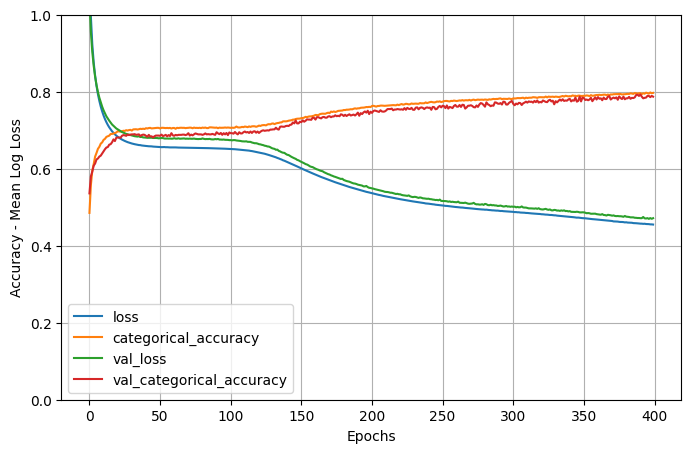

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_accuracy = round(results.categorical_accuracy.values[-1:][0]*100, 2)
val_accuracy = round(results.val_categorical_accuracy.values[-1:][0]*100, 2)
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 2)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2)
human_error = 5
bias = round(training_error - human_error, 2)
variance = round(test_error - training_error, 2)
training_time = round(end_time - start_time)
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ", training_time, "seconds")

Error (training): 20.31 %
Error (test): 21.28 %
Bias: 15.31
Variance: 0.97
Time:  75 seconds


## Step 8: Save results

In [13]:
RESULTS_FOLDER = "../Results"
RESULTS_FILE = f"{RESULTS_FOLDER}/models_performance.csv"

In [14]:
results_df = pd.read_csv(RESULTS_FILE, index_col = 0)

In [15]:
COLUMNS = [
    'model_name',
    'epochs',
    'learning_rate',
    'batch_size',
    'activation',
    'loss',
    'optimizer',
    'regularization',
    'train_accuracy',
    'validation_accuracy',
    'bias',
    'variance',
    'training_time'
]

new_result = [[
    model_name,
    N_EPOCHS,
    LEARNING_RATE,
    BATCH_SIZE,
    ACTIVATION,
    "categorical_crossentropy",
    "SGD",
    "",
    training_accuracy,
    val_accuracy,
    bias,
    variance,
    training_time]]

new_result_df = pd.DataFrame(new_result, columns=COLUMNS)
concatenation = pd.concat([results_df, new_result_df], ignore_index=True)
concatenation.to_csv(RESULTS_FILE)


In [16]:
last_five = concatenation.tail(5)
print(last_five)
print("\n---Metrics---")
print(last_five[["train_accuracy", "validation_accuracy", "bias", "variance", "training_time"]].describe())

   model_name  epochs  learning_rate  batch_size activation  \
10       D512     400            0.1         512       tanh   
11       D512     400            0.1         512       tanh   
12       D512     400            0.1         512       tanh   
13       D512     400            0.1         512       tanh   
14       D512     400            0.1         512       tanh   

                        loss optimizer regularization  train_accuracy  \
10  categorical_crossentropy       SGD            NaN           79.57   
11  categorical_crossentropy       SGD            NaN           79.20   
12  categorical_crossentropy       SGD            NaN           79.79   
13  categorical_crossentropy       SGD            NaN           79.66   
14  categorical_crossentropy       SGD                          79.69   

    validation_accuracy   bias  variance  training_time  
10                78.54  15.43      1.03             67  
11                77.48  15.80      1.72             72  
12      

In [17]:
MODELS_FOLDER = "../Models"
save_name = f"{MODELS_FOLDER}/{model_name}-3.h5"
my_model.save(save_name)